In [140]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras
import skimage
from tensorflow.keras.layers import Conv2D,MaxPool2D,Input,UpSampling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from skimage.color import rgb2lab , lab2rgb
from skimage.transform import resize 
from skimage.io import imsave

In [141]:
path = 'D:/Bluetick works/color videos/k'

In [142]:
path

'D:/Bluetick works/color videos/k'

In [143]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [144]:
train = train_datagen.flow_from_directory(path , target_size=(256,256),batch_size=300,class_mode=None)

Found 288 images belonging to 1 classes.


In [145]:
import matplotlib.pyplot as plt 


In [146]:
train[0].shape

(288, 256, 256, 3)

In [147]:
for i in train[0]:
    print(i.shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 

In [148]:

X =[]
Y =[]
for img in train[0]:
    try:
        lab = rgb2lab(img)
        X.append(lab[:,:,0]) 
        Y.append(lab[:,:,1:] / 128) #A and B values range from -127 to 128, 
          #so we divide the values by 128 to restrict values to between -1 and 1.
    except:
        print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y
print(X.shape)
print(Y.shape)

(288, 256, 256, 1)
(288, 256, 256, 2)


In [149]:
img = load_img('./k/unsplash_com/abstract-4073887__340.jpg')

In [150]:
lab = rgb2lab(img)

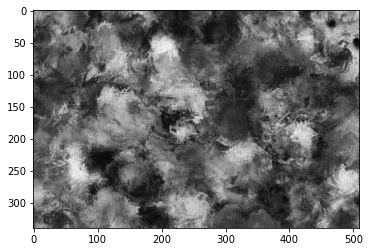

In [151]:
L = lab[:,:,0]
A = lab[:,:,1]
B = lab[:,:,2]
plt.imshow(L,cmap = 'gray')

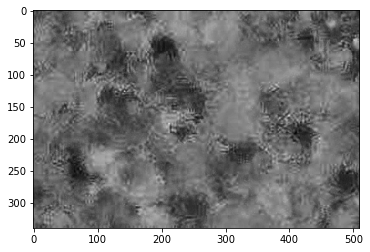

In [152]:
plt.imshow(A,cmap = 'gray')

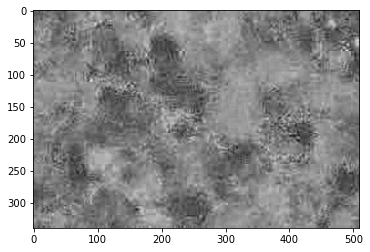

In [153]:
plt.imshow(B,cmap = 'gray')

In [154]:
X.shape

(288, 256, 256, 1)

In [155]:
Y.shape

(288, 256, 256, 2)

In [156]:

#Encoder

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))


In [157]:
#Decoder
#Decoder
#Note: For the last layer we use tanh instead of Relu. 
#This is because we are colorizing the image in this layer using 2 filters, A and B.
#A and B values range between -1 and 1 so tanh (or hyperbolic tangent) is used
#as it also has the range between -1 and 1. 
#Other functions go from 0 to 1.
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 64, 64, 256)       295168    
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 256)       590080    
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 512)       1180160   
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 512)      

In [166]:

model.fit(X,Y,validation_split=0.1, epochs=5, batch_size=16)

Epoch 1/5
17/17 [==============================] - 2s 111ms/step - loss: nan - accuracy: 0.4883 - val_loss: nan - val_accuracy: 0.3516
Epoch 2/5
17/17 [==============================] - 2s 111ms/step - loss: nan - accuracy: 0.4883 - val_loss: nan - val_accuracy: 0.3516
Epoch 3/5
17/17 [==============================] - 2s 111ms/step - loss: nan - accuracy: 0.4883 - val_loss: nan - val_accuracy: 0.3516
Epoch 4/5
17/17 [==============================] - 2s 111ms/step - loss: nan - accuracy: 0.4883 - val_loss: nan - val_accuracy: 0.3516
Epoch 5/5
17/17 [==============================] - 2s 111ms/step - loss: nan - accuracy: 0.4883 - val_loss: nan - val_accuracy: 0.3516


In [167]:
model.save('model/colorize_autoencoder.model')

INFO:tensorflow:Assets written to: model/colorize_autoencoder.model\assets


In [168]:
tf.keras.models.load_model('model/colorize_autoencoder.model',custom_objects=None,compile=True)
img1_color=[]
img1=img_to_array(load_img('./Einstein_1939.jpg'))
img1 = resize(img1 ,(256,256))
img1_color.append(img1)


In [169]:
img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))


In [170]:
output1 = model.predict(img1_color)
output1 = output1*128
result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]


In [171]:
a = lab2rgb(result)

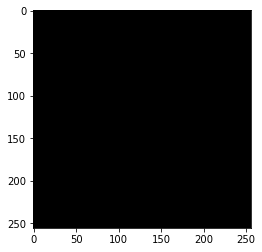

In [172]:
plt.imshow(a)